In [1]:
using Latexify 
using LaTeXStrings
using Distributions
using HCubature
include("../src/ifs.jl")

VERMELHO = [1, 0, 0]
VERDE = [0, 1, 0]
AZUL = [0, 0, 1]

COLORS_τ = (VERMELHO, VERDE, AZUL)

print("Done.")

Done.

$X,\Theta$ are compact metric spaces, equipped with $\mathscr{B}(X)$ and $\mathscr{B}(\Theta)$ respectively the Borel $\sigma$-algebra for $X$ and $\Theta$.

Take $\mu={(\mu_{x})}_{x\in X}$ a collection of measures on $\mathscr{B}(\Theta)$, such that
- $0 < \mu_{x}(\Theta) < \infty$ for all $x\in X$,
- $x \mapsto \mu_{x}(A)$ is a Borel map, i.e, is $\mathscr{B}(X)$-measurable for all fixed $A\in\mathscr{B}(\Theta)$.
- $x \mapsto \mu_{x}$ is weak$^{*}$-continuous.

An Iterated Function System with measures $\mu$, IFSm for short, is a triple
$\mathscr{R}(\mu)=(X, \tau, \mu)$, where $\tau={(\tau_{\theta})}_{\theta\in\Theta}$ is a collection of functions from $X$ to itself with the following
- $\tau: (\Theta, X) \mapsto X$, where $\tau(\theta, x) = \tau_{\theta}(x)$ is continuous.

The $\mathscr{R}(\mu)$ is said to be **normalized** if for all $x\in X$, $\mu_{x}$ is a probability measure.

In [2]:
# v ∈ [0, 1]×[0, 1] = X, Θ = {1, 2, …, 6}
f₁(v) = v ./ 2
f₂(v) = f₁(v) .+ [1, 0]
f₃(v) = f₁(v) .+ [0, 1]

################# IFSm ####################
X = Jifs.QuadPlot(
    (pos, w, h) -> pos .* [w, h],
    (Uniform(0, 1), Uniform(0, 1)) # pega um ponto aleatório em X=[0, 1]×[0, 1]
)
τ = [f₁, f₂, f₃]
μ = [1/3, 1/3, 1/3]

# configs
width, heigth = (300, 300)
npoints = 100
iters = 500

τ_colors = [
    Jifs.IFSMap(τ[i], color=COLORS_τ[i]) 
                        for i in 1:length(τ)  
]

# Definindo IFSm
ifs_simples = Jifs.IFS(
    Jifs.ImageData(width, heigth),
    τ_colors, #Jifs.IFSMap.(τ),
    μ
)

# Painting img
Jifs.painting!(ifs_simples, iters, npoints, quad=X)

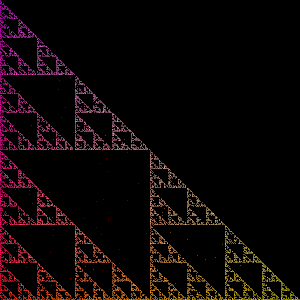

In [4]:
Jifs.showifs!(ifs_simples, iters)

In [5]:
width, heigth = (600, 300)
npoints = 1000
iters = 4000

ifs_fern = Jifs.barnsley_fern(width, heigth)
Jifs.painting!(ifs_fern, iters, npoints, quad=Jifs.Quad12)

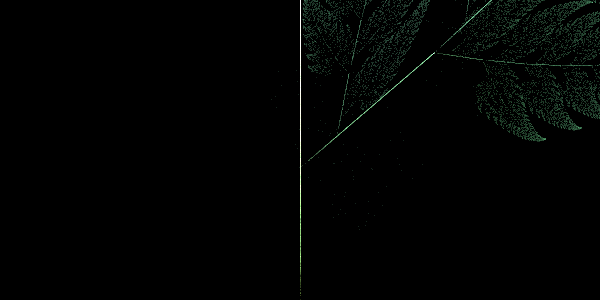

In [6]:
Jifs.showifs!(ifs_fern, iters)

### O que há de novo nisso?
1. O conjunto de mapas não precisa ser finito.

In [12]:
function rand_rot(vec)
    θ = rand(Uniform(0, π/2))
    [
        cos(θ) -sin(θ)
        sin(θ) cos(θ)
    ] * vec
end

m = fill([1., 1.], 3)
display(rand_rot.(m))

3-element Vector{Vector{Float64}}:
 [0.45334254329649, 1.3395822253364928]
 [-0.2133959441777168, 1.3980208049269156]
 [-0.3802990497668627, 1.362120638103109]

In [8]:
τ_colors2 = [
    Jifs.IFSMap(τ[i], color=COLORS_τ[i]) 
                        for i in 1:length(τ)  
]
push!(τ_colors2, Jifs.IFSMap(rand_rot, color=[1, 0, 1]))

μ2 = ones(4) ./ 4

# configs
width, heigth = (300, 300)
npoints = 500
iters = 4000

# Definindo IFSm
ifs_simples2 = Jifs.IFS(
    Jifs.ImageData(width, heigth),
    τ_colors2, 
    μ2
)

# Painting img
Jifs.painting!(ifs_simples2, iters, npoints, quad=Jifs.Quad0) #[-1, 1]²

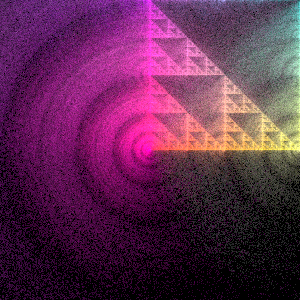

In [9]:
Jifs.showifs!(ifs_simples2, iters)

In [3]:
τ = [f₁, f₂, f₃]

Rx(vec) = vec .* [1, -1]
Ry(vec) = vec .* [-1, 1]
Rxy(vec) = vec .* [-1, -1]

μ₃ = ones(12) ./ 12
τ₃ = [f for f ∈ τ] ∪ [Rx ∘ f ∘ Rx for f ∈ τ] ∪ [Ry ∘ f ∘ Ry for f ∈ τ] ∪ [Rxy ∘ f ∘ Rxy for f ∈ τ]

12-element Vector{Function}:
 f₁ (generic function with 1 method)
 f₂ (generic function with 1 method)
 f₃ (generic function with 1 method)
 Rx ∘ f₁ ∘ Rx
 Rx ∘ f₂ ∘ Rx
 Rx ∘ f₃ ∘ Rx
 Ry ∘ f₁ ∘ Ry
 Ry ∘ f₂ ∘ Ry
 Ry ∘ f₃ ∘ Ry
 Rxy ∘ f₁ ∘ Rxy
 Rxy ∘ f₂ ∘ Rxy
 Rxy ∘ f₃ ∘ Rxy

In [4]:
# configs
width, heigth = (200, 200)
npoints = 500
iters = 300

# Definindo IFSm
ifs_simples3 = Jifs.IFS(
    Jifs.ImageData(width, heigth),
    Jifs.IFSMap.(τ₃), 
    μ₃
)

# Painting img
Jifs.painting!(ifs_simples3, iters, npoints, quad=Jifs.Quad0)

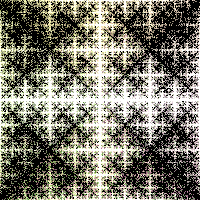

In [5]:
Jifs.showifs!(ifs_simples3, iters)

In [6]:
function μ₄(vec)
    x, y = vec
    pv = ones(3) ./ 3
 
    if x >= 0 && y >= 0
        return vcat(pv, zeros(9))
    elseif x < 0 && y >= 0
        return vcat(zeros(3), pv, zeros(6))
    elseif x >= 0 && y < 0
        return vcat(zeros(6), pv, zeros(3))
    else
        return vcat(zeros(9), pv)
    end
end

μ₄ (generic function with 1 method)

In [9]:
# configs
width, heigth = (200, 200)
npoints = 500
iters = 300


# Definindo IFSm
ifs_simples4 = Jifs.IFSm(
    Jifs.ImageData(width, heigth),
    Jifs.IFSMap.(τ₃), 
    μ₄
)

# Painting img
Jifs.painting!(ifs_simples4, iters, npoints, quad=Jifs.Quad0)

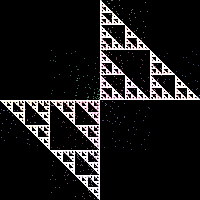

In [10]:
Jifs.showifs!(ifs_simples4, iters)

In [39]:
function μ₅(vec)
    norm² = vec[1]^2 + vec[2]^2
    prob = μ₄(vec)
    if norm² > 0.25
        return vcat(prob .* 0.92, [0.08])
    end
    
    vcat(prob, [0])
end

μ₅ (generic function with 1 method)

In [40]:
# configs
width, heigth = (300, 300)
npoints = 500
iters = 300


# Definindo IFSm
ifs_simples5 = Jifs.IFSm(
    Jifs.ImageData(width, heigth),
    Jifs.IFSMap.(τ₃ ∪ [rand_rot]),
    μ₅
)

# Painting img
Jifs.painting!(ifs_simples5, iters, npoints, quad=Jifs.Quad0)

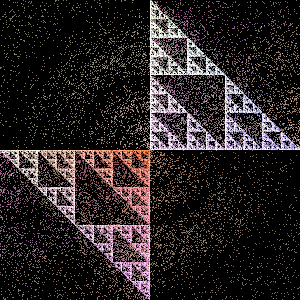

In [41]:
Jifs.showifs!(ifs_simples5, iters)